# Chapter 7 Optimization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
def fun(x):
    return (x - 1.5)**2


x1, x2 = -1, 2

while 1:
#     print(x1, x2)
    x3 = x1 + 1/3*(x2 - x1)
    x4 = x1 + 2/3*(x2 - x1)
    f3 = fun(x3)
    f4 = fun(x4)
    if f3 < f4:
        x2 = x4
    else:
        x1 = x3
    if np.abs(x1 - x2) < 1e-6:
        break

print(x1)
    

1.499999376593038


In [4]:
phi = 0.61803399
a, b = -1, 2
c = a + (1 - phi)*(b - a)
d = a + phi*(b - a)
fc, fd = fun(c), fun(d)    
while 1:
    # print(a, b)    
    if fc < fd:
        b = d
        d = c
        fd = fc
        c = a + (1 - phi)*(b - a)
        fc = fun(c)
    else:
        a = c
        c = d
        fc = fd
        d = a + phi*(b - a)
        fd = fun(d)
        
    if np.abs(a - b) < 1e-6:
        break
print(a)    

1.4999996060630332


## 7.2 One-dimensional Optimization

$$ \mbox{min} \quad f(x)$$
$$ \mbox{subject to} \quad a < x < b $$

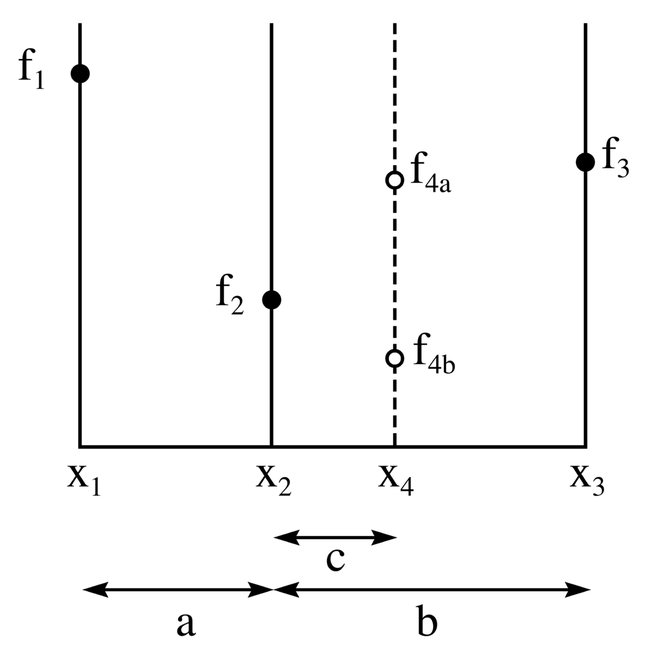

$$ \frac{c}{a} = \frac{a}{b} $$

$$ \frac{c}{b-c} = \frac{a}{b} $$

$$ \left ( \frac{b}{a} \right )^2 - \frac{b}{a} = 1 $$

$$ \frac{b}{a} = \phi = \frac{1 + \sqrt{5}}{2} = 1.618033988 \dots{} $$

$$ x^2 - x - 1 = 0$$

$$ x - 1 = 1/x$$ 

In [2]:
phi = np.roots([1, -1, -1])
phi

array([ 1.61803399, -0.61803399])

In [3]:
x = phi[0]
x, 1/x, x**2

(1.618033988749895, 0.6180339887498948, 2.618033988749895)

In [4]:
def gold_bracket(func, x1):
    phi = 1.618033988749895
    h = 0.01*np.max([1, np.abs(x1)])
    f1 = func(x1)
    x2 = x1 + h
    f2 = func(x2)
    if f2 > f1:
        h = -h
        x2 = x1 + h
        f2 = func(x2)
        if f2 > f1: return x2, x1 - h
    for i in range(100):
        h = phi*h
        x3 = x2 + h
        f3 = func(x3)
        if f3 > f2: 
            return x1, x3
        x1, x2 = x2, x3
        f2 = f3

In [5]:
def goldmin(fun, a, b, tol=1e-6):
    phi = 1.618033988749895
    c = b - (b - a)/phi
    d = a + (b - a)/phi
    fc = fun(c)
    fd = fun(d)
    
    while np.abs(c - d) > tol:
        if fc < fd:
            b = d
            d = c
            fd = fc
            c = b - (b - a)/phi
            fc = fun(c)
        else:
            a = c
            c = d
            fc = fd
            d = a + (b - a)/phi
            fd = fun(d)
            
    xmin = (a + b)/2
    fmin = fun(xmin)
    
    return xmin, fmin

In [6]:
goldmin(lambda x: x**2 - 1, -1, 1)

(8.696778974688745e-07, -0.9999999999992436)

### Example 7.2
Find the minimum of $ f(x) = \frac{x^2}{10} - 2 \sin(x) $  within the internal (0, 4)

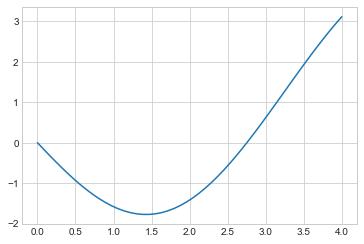

In [7]:
def fun(x):
    return x**2/10 - 2*np.sin(x)

x = np.linspace(0, 4)
plt.plot(x, fun(x))
plt.show()

In [8]:
# a, b = gold_bracket(fun, 0)
# print(a, b)
x, fmin = goldmin(fun, 0, 4)
print(x, fmin)

1.4275517496337753 -1.7757256531474142


In [9]:
from scipy.optimize import fminbound
fminbound(fun, 0, 4)

1.4275517992922275

## 7.3 Unconstrained Multidimensional optimization


$$ \mbox{min} \quad f(x)$$
$$ x = R^n$$

In [10]:
import numpy as np
from numpy.linalg import norm

In [11]:
# Rosenbrock's "banana function":
def banana(x):
    x1, x2 = x    
    return 100.0*(x2 - x1**2)**2 + (1 - x1)**2

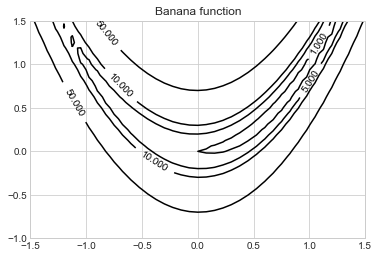

In [12]:
x = np.linspace(-1.5, 1.5, 41)
y = np.linspace(-1, 1.5, 41)
X, Y = np.meshgrid(x, y)

F = banana([X, Y])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, F, [1, 5, 10, 50], colors='k')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Banana function');

In [13]:
from scipy.optimize import fmin
fmin(banana, [-1, 1])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 100
         Function evaluations: 187


array([1.00000102, 1.00000004])

In [14]:
def line_search_1(func, x, d):
    func_line = lambda alpha: func(x + alpha*d)
    a, b = gold_bracket(func_line, 0)
    return goldmin(func_line, a, b)  

def line_search(func, x, d):
    func_line = lambda alpha: func(x + alpha*d)
    a, b = gold_bracket(func_line, 0)
    alpha, fmin = goldmin(func_line, a, b)
    x = x + alpha*d
    return x, fmin

In [15]:
def cyclic_coordinate(func, x, tol=1.e-6, maxiter=100):
    n = len(x)
    e = np.eye(n)
    for k in range(maxiter):
        xold = x
        for i in range(n): x, fmin = line_search(func, x, e[i])
        if norm(x-xold) < tol*np.max([1.0, norm(x)]): return x, fmin, k 
    return None

In [16]:
cyclic_coordinate(banana, [-1,1], maxiter=5000)

(array([0.99939196, 0.99878329]), 3.698121922174485e-07, 2422)

In [17]:
def powell(func, x, tol=1.e-6, kmax=100):
    n = len(x)
    e = np.eye(n)
    df = np.empty_like(x) 
    fmin = func(x)
    for k in range(kmax):
        xold, fold = x, fmin
        for i in range(n):
            x, fmin = line_search(func, x, e[i])
            df[i] = fold - fmin
            fold = fmin
        d = x - xold
        x, fmin = line_search(func, x, d)
        if norm(d) < tol*np.max([1.0, norm(x)]): 
            return x, fmin, k
        imax = np.argmax(np.abs(df))
        e[imax:-1] = e[imax+1:]
        e[-1] = d
    return None

In [18]:
powell(banana, [-1,1])

(array([1., 1.]), 2.4512886927428337e-17, 10)

In [19]:
def gradient(func, x, tol=1.0e-4):
    n = len(x)
    e = np.eye(n)
    df = np.empty_like(x)    
    h = tol*np.max([1.0, norm(x)])
    f = func(x)
    for i in range(n):
        f1 = func(x + e[i]*h)
        df[i] = (f1 - f)/h
    return df

In [20]:
def steepest_descent(func, x, tol=1.0e-6, maxiter=100):    
    for k in range(maxiter):
        xold = x
        d = -gradient(func, x)        
        x, fmin = line_search(func, x, d)
        if norm(x - xold) < tol*np.max([1.0, norm(x)]): 
            return x, fmin, k 
    return None

In [21]:
steepest_descent(banana, [-1,2], tol=1e-5, maxiter=1000)

(array([0.95281737, 0.9077082 ]), 0.0022285336579598056, 398)

In [22]:
def fletcher_reeves(func, x, tol=1.e-6, kmax=100):    
    g0 = -gradient(func, x)
    v = g0
    for k in range(kmax):
        xold = x
        x, fmin = line_search(func, x, v)
        if norm(x - xold) < tol*np.max([1.0, norm(x)]): 
            return x, fmin, k
        g1 = -gradient(func, x)
        gamma = np.dot(g1-g0, g1)/np.dot(g0, g0)
        v = g1 + gamma*v
        g0 = g1
    return None

In [23]:
fletcher_reeves(banana, [-1,1])

(array([1.00021366, 1.00042868]), 4.5823891938101154e-08, 19)

### Example 7.4 2차원 함수의 시각화
$$ f(x_1, x_2 ) = 2 + x_1 - x_2 + 2 x_1^2 + 2 x_1 x_2 + x_2^2$$


In [24]:
def func(x): 
    x1, x2 = x
    return 2 + x1 - x2 + 2*x1**2 + 2*x1*x2 + x2**2

x = np.linspace(-2, 0, 40)
y = np.linspace(0, 3, 40)
X, Y = np.meshgrid(x, y)
F = func([X, Y])

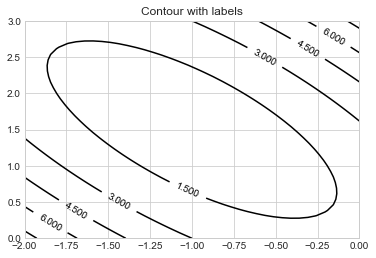

In [25]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, F, 5, colors='k')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour with labels');

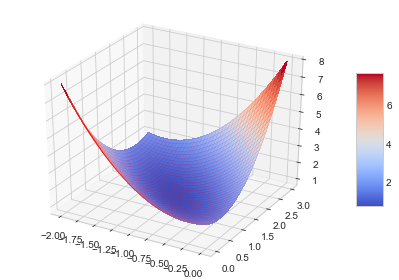

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, F, cmap='coolwarm', linewidth=0, antialiased=False)
wire = ax.plot_wireframe(X, Y, F, color='r', linewidth=0.1)
fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout();

### Case Study 7.4 Equilibrium and Potential Energy

$$ pe = k x^2 / 2 - F x$$ 

In [27]:
def func(x, ka, kb, La, Lb, F1, F2):
    x1, x2 = x
    return (0.5*ka*(np.sqrt(x1**2 + (La - x2)**2) - La)**2 
            + 0.5*kb*(np.sqrt(x1**2 + (Lb + x2)**2) - Lb)**2 
            - F1*x1 - F2*x2 )

In [28]:
ka, kb, La, Lb, F1, F2 = 9, 2, 10, 10, 2, 4
sol = fmin(lambda x: func(x, ka, kb, La, Lb, F1, F2), [0.5, 0.1])   
print(sol)

# matlab   fminsearch 

Optimization terminated successfully.
         Current function value: -9.642204
         Iterations: 56
         Function evaluations: 106
[4.95227534 1.27684652]


## Python function

**scipy.optimize**

>minimize(fun, x0[, args, method, jac, hess, ...])	Minimization of scalar function of one or more variables.

>minimize_scalar(fun[, bracket, bounds, ...])	Minimization of scalar function of one variable.


In [29]:
from scipy.optimize import minimize, minimize_scalar

In [30]:
def func(x):
    return x**2/10 - 2*np.sin(x)

minimize_scalar(func, bracket=[0, 4]).x

1.427551781310228

In [31]:
def func(x):
    x1, x2 = x    
    return (x1 - 2)**4 + (x1 - 2*x2)**2

minimize(func, [0, 3]).x

array([1.98855612, 0.99427805])

### Multidimensional equation

In [32]:
def jacobian(func, x, h=1e-5):
    n = len(x)
    e, Jac = np.eye(n), np.zeros((n,n))
    f = func(x)
    for j in range(n): 
        Jac[:, j] = (func(x + e[j]*h) - f)/h
    return Jac, f

def newton_raphson(func, x, tol=1e-6):
    k = 0
    while 1:
        k += 1
        Jac, f = jacobian(func, x)
        dx = np.linalg.solve(Jac, -f)
        x = x + dx
        if np.linalg.norm(dx) < tol: 
            return x, k

In [33]:
def func(x):
    x1, x2 = x
    f1 = x1**2 + x2**2 - 3
    f2 = x1*x2 - 1
    return np.array([f1, f2])

newton_raphson(func, [1.5, 1.2])

(array([1.61803399, 0.61803399]), 6)

In [34]:
def func(x):
    x1, x2 = x
    f1 = x1**2 + x2**2 - 3
    f2 = x1*x2 - 1
    return f1**2 + f2**2

fletcher_reeves(func, [1.5, 1.2])

(array([1.61803407, 0.61803381]), 5.895246616737473e-14, 6)

In [35]:
def func(var, x_object=300, y_object=50, theta_object=np.pi/4):
    g = 9.81
    v, theta, t = var
    x = v*np.cos(theta)*t
    y = -0.5*g*t**2 + v*np.sin(theta)*t
    vx = v*np.cos(theta)
    vy = -g*t + v*np.sin(theta)
    f1 = x - x_object
    f2 = y - y_object
    f3 = vy/vx - np.tan(-theta_object)
    return np.array([f1, f2, f3])     

In [36]:
newton_raphson(func, [60, 1, 10])

(array([59.19097422,  0.92729522,  8.44723383]), 5)

## Problem 7.40
minimize
$$ L = \frac{w_1}{\sin(\theta)} + \frac{w_2}{\sin(\pi - \alpha -\theta )}$$

In [37]:
from scipy.optimize import minimize_scalar
def sind(t): return np.sin(t/180*np.pi)
def length(theta, w1, w2, alpha): return w1/sind(theta) + w2/sind(180 - alpha - theta)

   45     67.50      4.33
   55     62.50      4.51
   65     57.50      4.74
   75     52.50      5.04
   85     47.50      5.43
   95     42.50      5.92
  105     37.50      6.57
  115     32.50      7.44
  125     27.50      8.66
  135     22.50     10.45


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\scipy\optimize\optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\scipy\optimize\optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\scipy\optimize\o

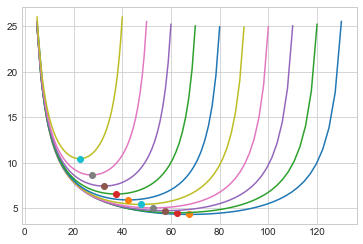

In [38]:
from scipy.optimize import rosen, minimize_scalar

w1 = w2 = 2
for alpha in range(45, 136, 10):
    theta = np.linspace(5, 180.0-alpha - 5)    
    L = length(theta, w1, w2, alpha)    
    plt.plot(theta, L)    
    
    fun = lambda theta: length(theta, w1, w2, alpha) 
    
#     theta, L = goldmin(fun, 0, 180 - alpha)    

    res = minimize_scalar(fun, bounds=(0, 180-alpha))
    theta, L = res.x, res.fun
    
    print("{:5d}{:10.2f}{:10.2f}".format(alpha, theta, L))
    plt.plot(theta, L, 'o')

## Optimization and Root Finding (scipy.optimize)

### Scalar Functions Optimization
- minimize_scalar(fun[, bracket, bounds, …]) Minimization of scalar function of one variable.

The minimize_scalar function supports the following methods:

- minimize_scalar(method=’brent’)
- minimize_scalar(method=’bounded’)
- minimize_scalar(method=’golden’)

### Local (Multivariate) Optimization
minimize(fun, x0[, args, method, jac, hess, …]) Minimization of scalar function of one or more variables.

The minimize function supports the following methods:

- minimize(method=’Nelder-Mead’)
- minimize(method=’Powell’)
- minimize(method=’CG’)
- minimize(method=’BFGS’)

## Root finding

### Scalar functions

- root_scalar(f[, args, method, bracket, …]) Find a root of a scalar function.
- brentq(f, a, b[, args, xtol, rtol, maxiter, …]) Find a root of a function in a bracketing interval using Brent’s method.

### Multidimensional

root(fun, x0[, args, method, jac, tol, …]) Find a root of a vector function.

The root function supports the following methods:

- root(method=’hybr’)
- root(method=’lm’)
- root(method=’broyden1’)
- root(method=’broyden2’)

In [39]:
def fun(x): return x**2/10 - 2*np.sin(x)

In [40]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(fun)
res

     fun: -1.775725653147415
    nfev: 13
     nit: 9
 success: True
       x: 1.4275517797142416

In [41]:
from scipy.optimize import rosen, minimize
res = minimize(rosen, [-1,1])
res

      fun: 2.016818530969385e-11
 hess_inv: array([[0.49875803, 0.9972747 ],
       [0.9972747 , 1.99904147]])
      jac: array([-7.09905047e-07,  3.42186124e-07])
  message: 'Optimization terminated successfully.'
     nfev: 160
      nit: 31
     njev: 40
   status: 0
  success: True
        x: array([0.99999551, 0.99999101])

In [42]:
# Case study 7.4
from scipy.optimize import minimize

ka, kb = 9, 2
La, Lb = 10, 10
F1, F2 = 2, 4
def potential_energy(x):
    x1, x2 = x
    pea = 0.5*ka*(np.sqrt(x1**2 + (La - x2)**2) - La)**2
    peb = 0.5*kb*(np.sqrt(x1**2 + (Lb + x2)**2) - Lb)**2 - F1*x1 - F2*x2
    return pea + peb

x0 = [1,1]
res = minimize(potential_energy, x0)
res

      fun: -9.642203594063307
 hess_inv: array([[0.62845747, 0.24037624],
       [0.24037624, 0.20904785]])
      jac: array([4.76837158e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([4.95230256, 1.27685163])

## 문제 6-35
주철로 만든 파이프가 유량 $Q = 0.3 \rm m^3/s$ 로 물을 수송한다. 수두손실 식은 다음과 같다. 

$$ h_L = f \frac{L}{D} \frac{V^2}{2 g}$$

마찰계수(friction factor)는 Colebrook 식에 의해 결정되며, 유량은 $Q = A V$, $A = \pi D^2 / 4$ 이다.  수두손실이 파이프 단위길이당 0.006 m  보다 작기 위한 최소 직경 $D$ 를 구하라. 주철관 표면 거칠기는 0.4 mm 이고, 물의 점성은 $\nu = 1.16 \times 10^{-6} \rm m/s^2$ 이다.

$$ \rm Re = \it \frac{\rho V D}{\mu} = \frac{V D}{\nu} \quad \rm RR = \it \frac{\epsilon}{D}$$

Colebrook 
$$ {\displaystyle {\frac {1}{\sqrt {f}}}=-2\log \left({\frac {\varepsilon }{3.7D_{\mathrm {h} }}}+{\frac {2.51}{\mathrm {Re} {\sqrt {f}}}}\right)} $$
Haaland
$$ {\displaystyle {\frac {1}{\sqrt {f}}}=-1.8\log \left[\left({\frac {\varepsilon /D}{3.7}}\right)^{1.11}+{\frac {6.9}{\mathrm {Re} }}\right]} $$

In [43]:
# problem 6-35
import numpy as np

def secant(fun, x1, x2=None, tol=1e-6, kmax=100):    
    if x2 == None: 
        x2 = 1.1*x1
    f1, f2 = fun(x1), fun(x2)
    for k in range(kmax):
        x3 = x2 - f2*(x1 - x2)/(f1 - f2)
        f3 = fun(x3)
        if np.abs(x2 - x3) < tol*np.abs(x2 + x3):
            return x3
        x1, f1 = x2, f2
        x2, f2 = x3, f3
    return None

def moody(Re, RR=0, tol=1e-6):
    print('o', end='')
    if Re < 2300: 
        return 64/Re
    x = -1.8*np.log10((RR/3.7)**(1.11) + 6.9/Re)
    b = RR/3.7
    a = 2.51/Re
    while 1:
        print('.', end='')
        xold = x
        x = -2*np.log10(a*x + b)
        if np.abs(x-xold) < tol*np.abs(x):
            return 1/x**2

def head_loss(Q, D):
    g = 9.81
    A = np.pi*D**2/4
    V = Q/A
    Re = V*D/nu
    RR = epsilon/D
    f = moody(Re, RR)
    h_loss = f/D * V**2/(2*g) 
    print(' -- ', h_loss)
    return h_loss

if __name__ == "__main__":
    
    nu = 1.16e-6
    epsilon = 0.4e-3
    
    Q = 0.3
    h = 0.006
    fun = lambda D: head_loss(Q, D) - h
    
#     D = np.linspace(0.4, 0.5)
#     f = [fun(D1) for D1 in D]    
#     plt.plot(D, f)
#     plt.show()
    
    D = secant(fun, 0.5)
    print(D)
    

o... --  0.004557297907653158
o... --  0.002782216922043113
o... --  0.007074924056040462
o... --  0.005508153871374346
o... --  0.005950604265237253
o... --  0.0060025955110373525
o... --  0.005999987138649883
o... --  0.005999999996671445
0.47417783671562297


47.74295197486731 9.865662555435438
10.014103975602543
9.865662555435438
10.018030613298532


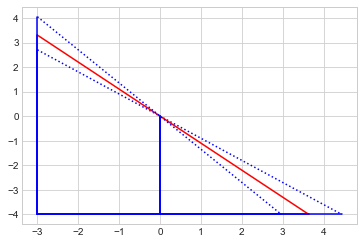

In [45]:
"""
problem 7.39
"""

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# from utility import goldmin
from scipy.optimize import minimize_scalar

def ladder(d, h, t, line):
    L1 = d/np.cos(t)
    L2 = h/np.sin(t) 
    
    x1 = -d
    y1 = L1*np.sin(t)
    
    x2 = L2*np.cos(t)
    y2 = -h
    
    plt.plot([x1, x2], [y1,y2], line)
    plt.plot([0, 0], [-h,0], 'b')
    plt.plot([x1, x1], [y2, y1], 'b')
    plt.plot([x1, x2], [y2, y2], 'b')
    return

h = 4
d = 3

fun = lambda t: d/np.cos(t) + h/np.sin(t) 

# res = minimize_scalar(fun, method='brent', 
#                       bracket=(0.1, np.pi/4, np.pi/2-0.1))
# t = res.x
# L = res.fun
t, L = goldmin(fun, 0.1, np.pi/2 - 0.1)
print(t/np.pi*180, L)

dt = -0.1; ladder(d, h, t+dt, 'b:'); print(fun(t+dt))
dt =  0.0; ladder(d, h, t+dt, 'r-'); print(fun(t+dt))
dt =  0.1; ladder(d, h, t+dt, 'b:'); print(fun(t+dt))

plt.show()
